## DNA analysis

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import logging
from plotnine import *
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.insert(0,'/home/_shared/_projects/nucl_gmx')
from nucl_sys import systems as sys
import pynucl
from plotnine import *
import io, requests
#logging.basicConfig(level=logging.DEBUG, format='%(asctime)s %(name)s %(levelname)s:%(message)s')

_ColormakerRegistry()

In [2]:
sys['h3-h4_2_tm_100DNA']

{'topol': '/home/_shared/_projects/nucl_gmx/h3-h4_2_tm_100DNA/GMX_system/sys_ref.pdb',
 'trj': '/home/_shared/_projects/nucl_gmx/h3-h4_2_tm_100DNA/big_data/sys_md.xtc',
 'name': 'h3-h4_2_tm_100DNA'}

In [3]:
# p=pynucl.nuclstr(h,format='PDB',ref="1KX5_NRF",fullseqs='1KX5')
p=pynucl.nucltrj(**sys['h3-h4_2_tm_100DNA'],time=(0,None,1),fullseqs='1KX5',auto_detect_entities=True)

1057 frames loaded for h3-h4_2_tm_100DNA


/opt/miniconda3/envs/moldyn/lib/python3.7/site-packages/MDAnalysis/analysis/base.py:116: DeprecationWarning: Setting the following kwargs should be done in the run() method: start, step
  DeprecationWarning)


In [14]:
p.nucl_sel_expand('maj_groove')

'(nucleic and ((resname DC and name C6 C5 C4 N4) or (resname DG and name O6 C6 C5 N7 C8) or (resname DA and name  N6 C5 N7) or (resname DT and name C6 C5 C7 C5M O4 C4)))'

In [12]:
view=p.view()


In [16]:
print(p.dyad_top)
print(p.dyad_bot)

('I', 0)
('J', 0)


In [6]:
p.DNA_right_l

50

In [4]:
d=pynucl.a_DNA(p,time=(0,100,1),num_threads=4)
#check uf parallel is correct
#d_parallel.df.equals(d.df)

In [11]:
d.df_series[['BPnum_dyad','Frame','coord']]

,BPnum_dyad,Frame,coord
0,-50,0,"[-31.5115, -28.2596, 14.094]"
1,-49,0,"[-28.876, -29.8854, 14.023]"
2,-48,0,"[-26.1915, -31.955, 14.5256]"
3,-47,0,"[-24.4293, -35.2529, 13.4586]"
4,-46,0,"[-21.2195, -36.7776, 13.3225]"
...,...,...,...
10095,46,99,"[-13.3362, -79.2831, -1.9915]"
10096,47,99,"[-13.2935, -81.492, -0.0368]"
10097,48,99,"[-11.9588, -84.4047, 2.8246]"
10098,49,99,"[-10.4164, -87.951, 2.8397]"


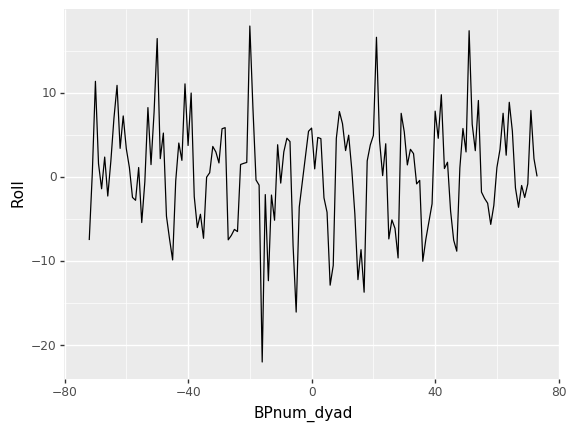

<ggplot: (8730863314731)>

In [10]:
(ggplot(d.df,aes(x='BPnum_dyad',y='Roll'))+geom_line())

In [11]:
d.df

,BPnum,BPname,BPnum_dyad,segid,resid,x,y,z,Shear,Stretch,...,v0_2,v1_2,v2_2,v3_2,v4_2,tm_2,P_2,ssZp_2,Dp_2,coord
0,1,A+T,-73,I,-73,-25.446925,41.096539,24.703266,-3.271607,0.260054,...,-34.685714,41.132143,-31.308929,12.421429,13.816071,41.450000,141.791071,NaN,NaN,"[-25.446925, 41.096539285714286, 24.7032660714..."
1,1,A-T,-73,I,-73,-24.555141,42.864648,21.316652,0.074636,-0.011795,...,-33.697727,40.418182,-31.713636,13.543182,12.534091,41.611364,142.511364,NaN,NaN,"[-24.555140909090905, 42.86464772727271, 21.31..."
2,2,T-A,-72,I,-72,-27.778443,39.784514,21.813486,-0.168530,-0.023160,...,-27.081000,38.697000,-34.224000,19.694000,4.403000,40.060000,156.098000,2.5213,2.3599,"[-27.778443000000006, 39.784514, 21.8134859999..."
3,3,C-G,-71,I,-71,-28.920494,36.799926,20.803130,0.022710,-0.027660,...,-34.823000,42.532000,-33.449000,14.409000,12.819000,43.305000,143.652000,2.7115,2.3665,"[-28.920494000000005, 36.799926, 20.8031299999..."
4,4,A-T,-70,I,-70,-29.754412,33.623302,20.443795,0.112010,-0.021140,...,-31.229000,38.240000,-30.344000,13.372000,11.144000,38.978000,144.277000,2.0891,2.3171,"[-29.754412000000013, 33.62330199999999, 20.44..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,143,T-A,69,I,69,30.992355,30.242602,-20.382920,-0.117020,0.011450,...,-19.057000,28.864000,-26.931000,16.844000,1.267000,34.615000,152.909000,2.6111,2.4047,"[30.992355000000018, 30.242601999999987, -20.3..."
144,144,T-A,70,I,70,29.731996,33.193060,-20.579515,-0.109380,-0.012710,...,-30.783000,39.573000,-32.500000,15.964000,9.266000,42.663000,143.525000,2.2058,2.1307,"[29.73199599999999, 33.19306, -20.579514999999..."
145,145,G-C,71,I,71,28.544136,36.292413,-20.481018,-0.153700,-0.052940,...,-28.179000,36.032000,-29.737000,14.622000,8.405000,39.126000,146.638000,2.0313,2.2688,"[28.544136000000012, 36.292413, -20.4810180000..."
146,146,A-T,72,I,72,27.125377,39.369875,-20.780142,0.118510,0.016930,...,-30.730000,39.602000,-32.925000,16.310000,8.937000,40.631000,146.958000,1.9963,2.2628,"[27.125376999999993, 39.369875000000015, -20.7..."


In [12]:
plt=pynucl.plot_line(d.df,p,columns=['Roll'],startnumber=-73,funcgroups='\\funcgroup{xxx}{A}{Black}{Green}{upper}{up}',xshift=-0.5)

Startnumber!=1 - is buggy currently - use at your own risk


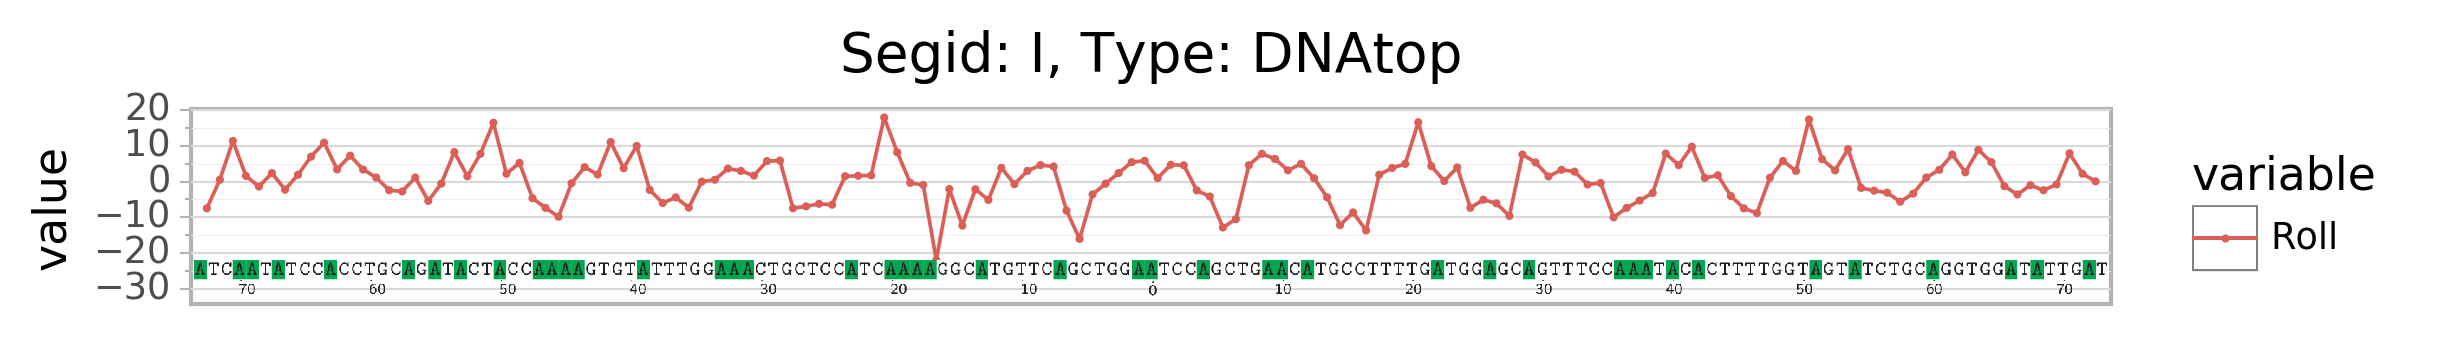

<ggplot: (-9223363306130523893)>

In [13]:
plt

Startnumber!=1 - is buggy currently - use at your own risk


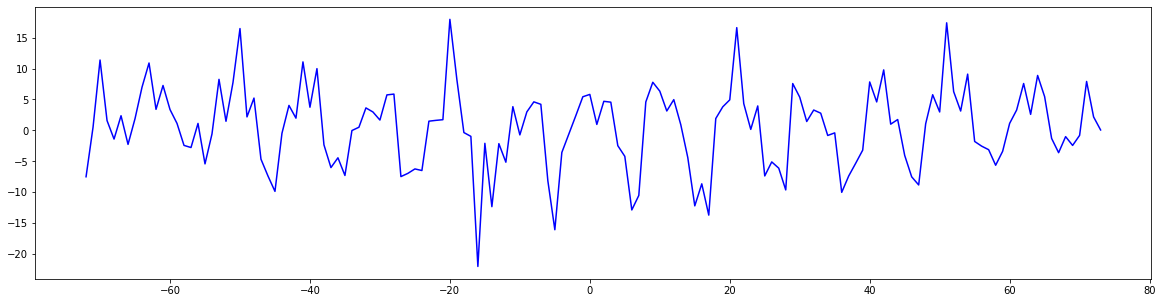

In [14]:
pynucl.plot_line_mpl(d.df,p,column='Roll',startnumber=-73,funcgroups='\\funcgroup{xxx}{A}{Black}{Green}{upper}{up}',xshift=-0.5)

#### BUG - на сотне кадров почему то сдвигается черная линия

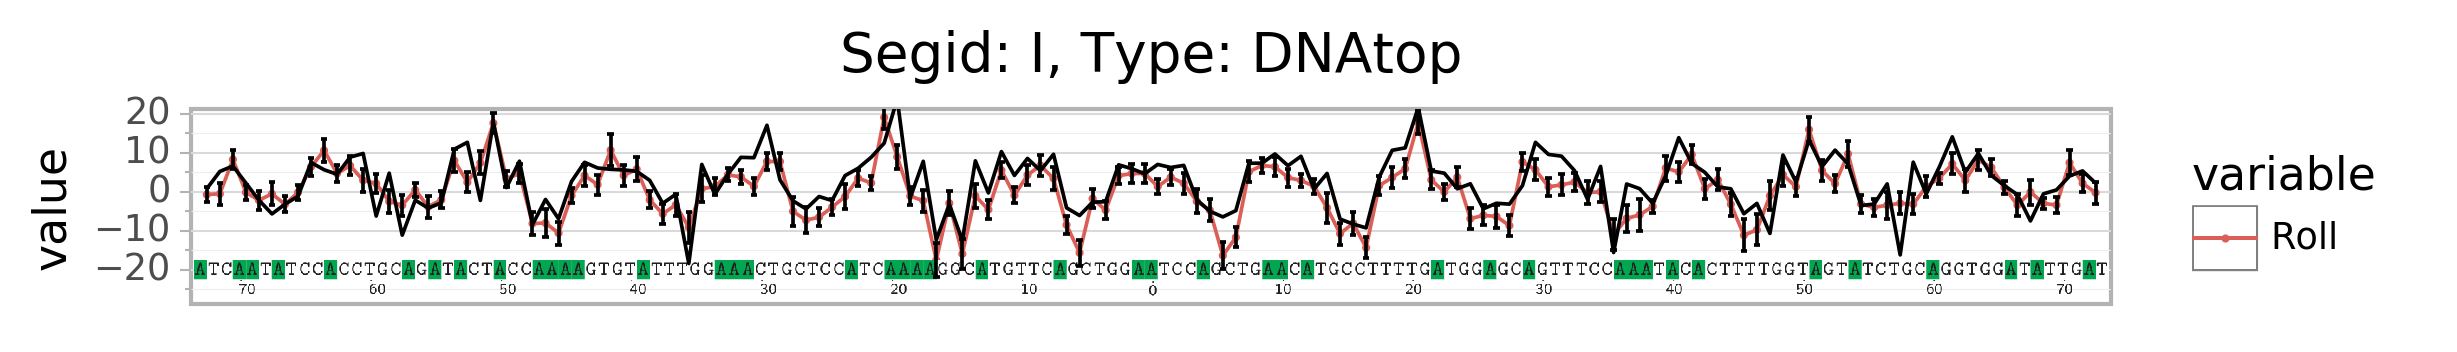

<ggplot: (-9223363268106725979)>

In [35]:
(plt+geom_errorbar(ymin=d.df['Roll']-d.df_std['Roll']/2,ymax=d.df['Roll']+d.df_std['Roll']/2)+geom_line(y=d.df_series[d.df_series['Time']==0]['Roll']))

## Relatve Twist

In [18]:
dr=pynucl.a_DNArtw(p,time=(0,2,1))

In [13]:

(np.array(list(p.bp_dict['top'].keys()))-p.dyad_top[1])

array([-50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38,
       -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
       -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12,
       -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
         2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50])

In [19]:
dr.df.iloc[15:28]

,BPnum,BPnum_dyad,segid,resid,rTwcont,rTwf,rTw
15,16,-35,I,-35,1140.175335,60.175335,60.175335
16,17,-34,I,-34,1106.753143,26.753143,26.753143
17,18,-33,I,-33,1067.613100,-12.386900,12.386900
18,19,-32,I,-32,1036.512352,-43.487648,43.487648
19,20,-31,I,-31,1000.426113,-79.573887,79.573887
20,21,-30,I,-30,968.120848,-111.879152,111.879152
21,22,-29,I,-29,930.483228,-149.516772,149.516772
22,23,-28,I,-28,896.881511,176.881511,176.881511
23,24,-27,I,-27,860.527037,140.527037,140.527037
24,25,-26,I,-26,824.827988,104.827988,104.827988


Startnumber!=1 - is buggy currently - use at your own risk


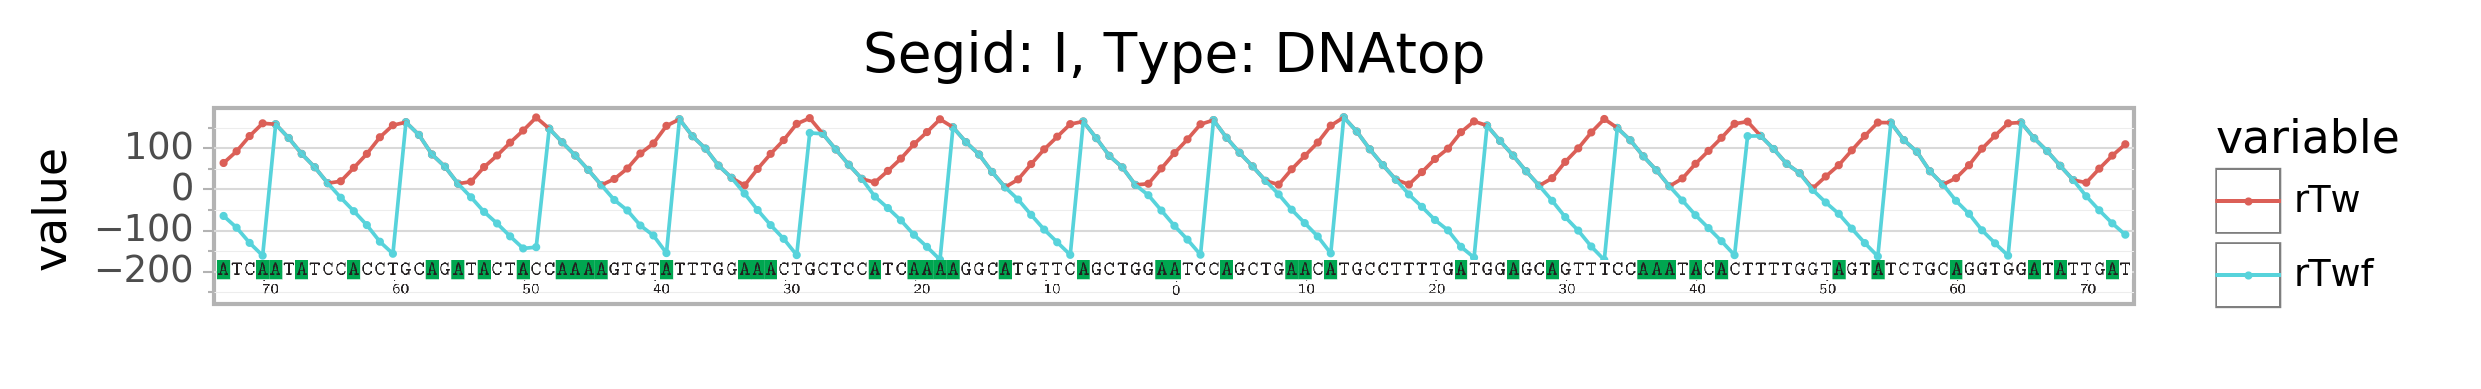

<ggplot: (-9223363268106469060)>

In [23]:
pynucl.plot_line(dr.df,p,columns=['rTw','rTwf'],startnumber=-73,funcgroups='\\funcgroup{xxx}{A}{Black}{Green}{upper}{up}')

## Let's examine 5Z3L

In [2]:
h=io.StringIO(requests.get('https://files.rcsb.org/download/%s.pdb'%('5Z3L')).content.decode("utf-8") )




In [3]:
p=pynucl.nuclstr(h,format='PDB',time=(0,None,1),fullseqs='5Z3L')

/opt/miniconda3/envs/moldyn/lib/python3.7/site-packages/MDAnalysis/analysis/base.py:116: DeprecationWarning: Setting the following kwargs should be done in the run() method: start, step
  DeprecationWarning)


In [29]:
p.dyad_top

('I', 0)

In [5]:
p.DNA_top_length

146

In [6]:
p.DNA_left_length

72

In [7]:
d=pynucl.a_DNA(p)

In [14]:
d.df.columns

Index(['BPnum', 'BPname', 'BPnum_dyad', 'segid', 'resid', 'x', 'y', 'z',
       'Shear', 'Stretch', 'Stagger', 'Buckle', 'Prop-Tw', 'Opening', 'Shift',
       'Slide', 'Rise', 'Tilt', 'Roll', 'Twist', 'Pairing', 'chi_1', 'alpha_1',
       'beta_1', 'gamma_1', 'delta_1', 'epsilon_1', 'zeta_1', 'e-z_1', 'chi_2',
       'alpha_2', 'beta_2', 'gamma_2', 'delta_2', 'epsilon_2', 'zeta_2',
       'e-z_2', 'v0_1', 'v1_1', 'v2_1', 'v3_1', 'v4_1', 'tm_1', 'P_1',
       'ssZp_1', 'Dp_1', 'v0_2', 'v1_2', 'v2_2', 'v3_2', 'v4_2', 'tm_2', 'P_2',
       'ssZp_2', 'Dp_2'],
      dtype='object')

Startnumber!=1 - is buggy currently - use at your own risk


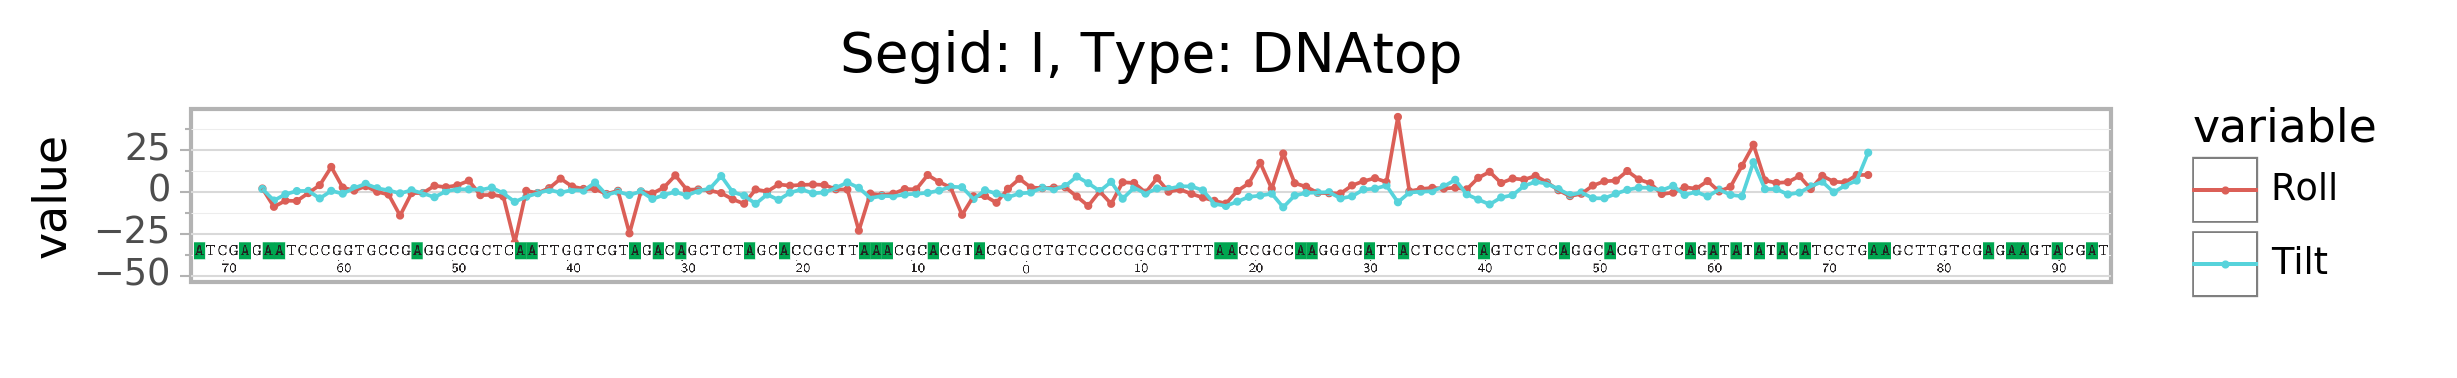

<ggplot: (8779896884109)>

In [22]:
(pynucl.plot_line(d.df[d.df['BPnum']>5],p,columns=['Roll','Tilt'],startnumber=-72,funcgroups='\\funcgroup{xxx}{A}{Black}{Green}{upper}{up}',xshift=-0.5))

Startnumber!=1 - is buggy currently - use at your own risk


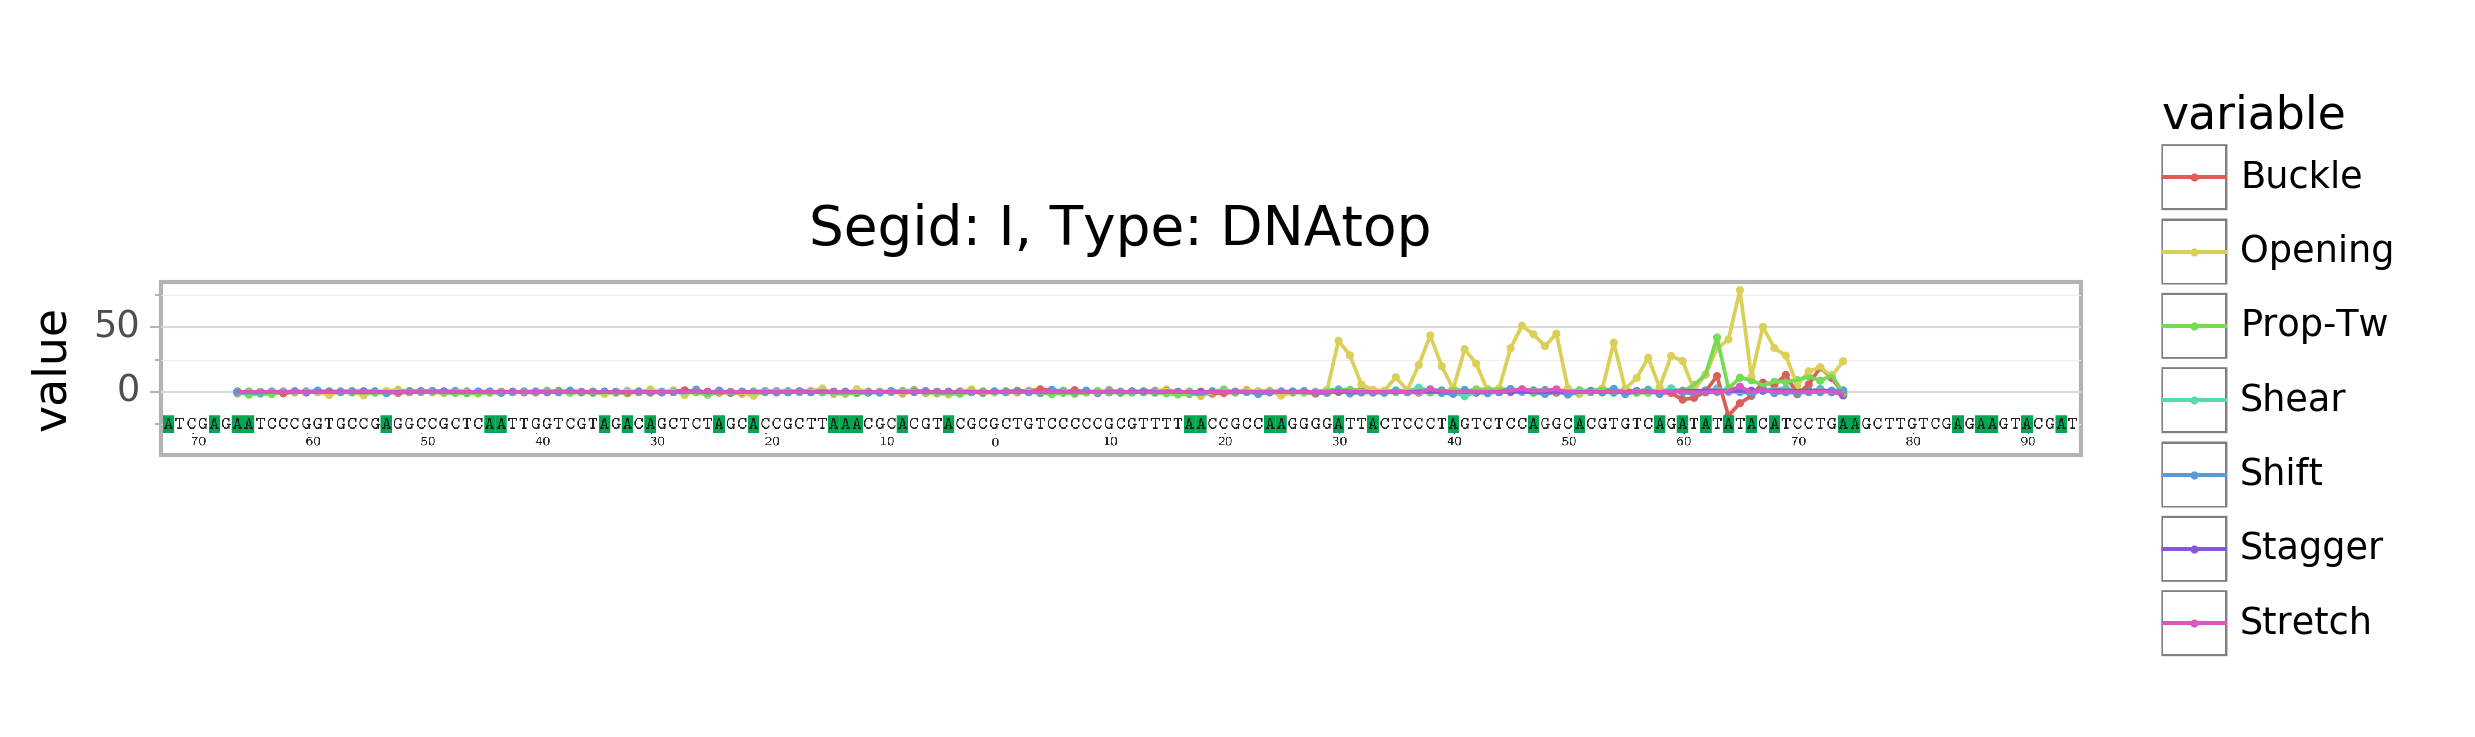

<ggplot: (-9223363256957839623)>

In [23]:
pynucl.plot_line(d.df[d.df['BPnum']>5],p,columns=['Shear', 'Stretch', 'Stagger', 'Buckle', 'Prop-Tw', 'Opening', 'Shift'],startnumber=-72,funcgroups='\\funcgroup{xxx}{A}{Black}{Green}{upper}{up}')

In [25]:
p=pynucl.nucltrj(**sys['5z3l_ntm_snf2'],time=(0,None,1),fullseqs='5Z3L')

In [28]:
p.view()

NGLWidget(max_frame=37)

In [26]:
p.dyad_top

('I', 0)

In [27]:
p.DNA_left_length

72

In [30]:
d=pynucl.a_DNA(p)

Startnumber!=1 - is buggy currently - use at your own risk


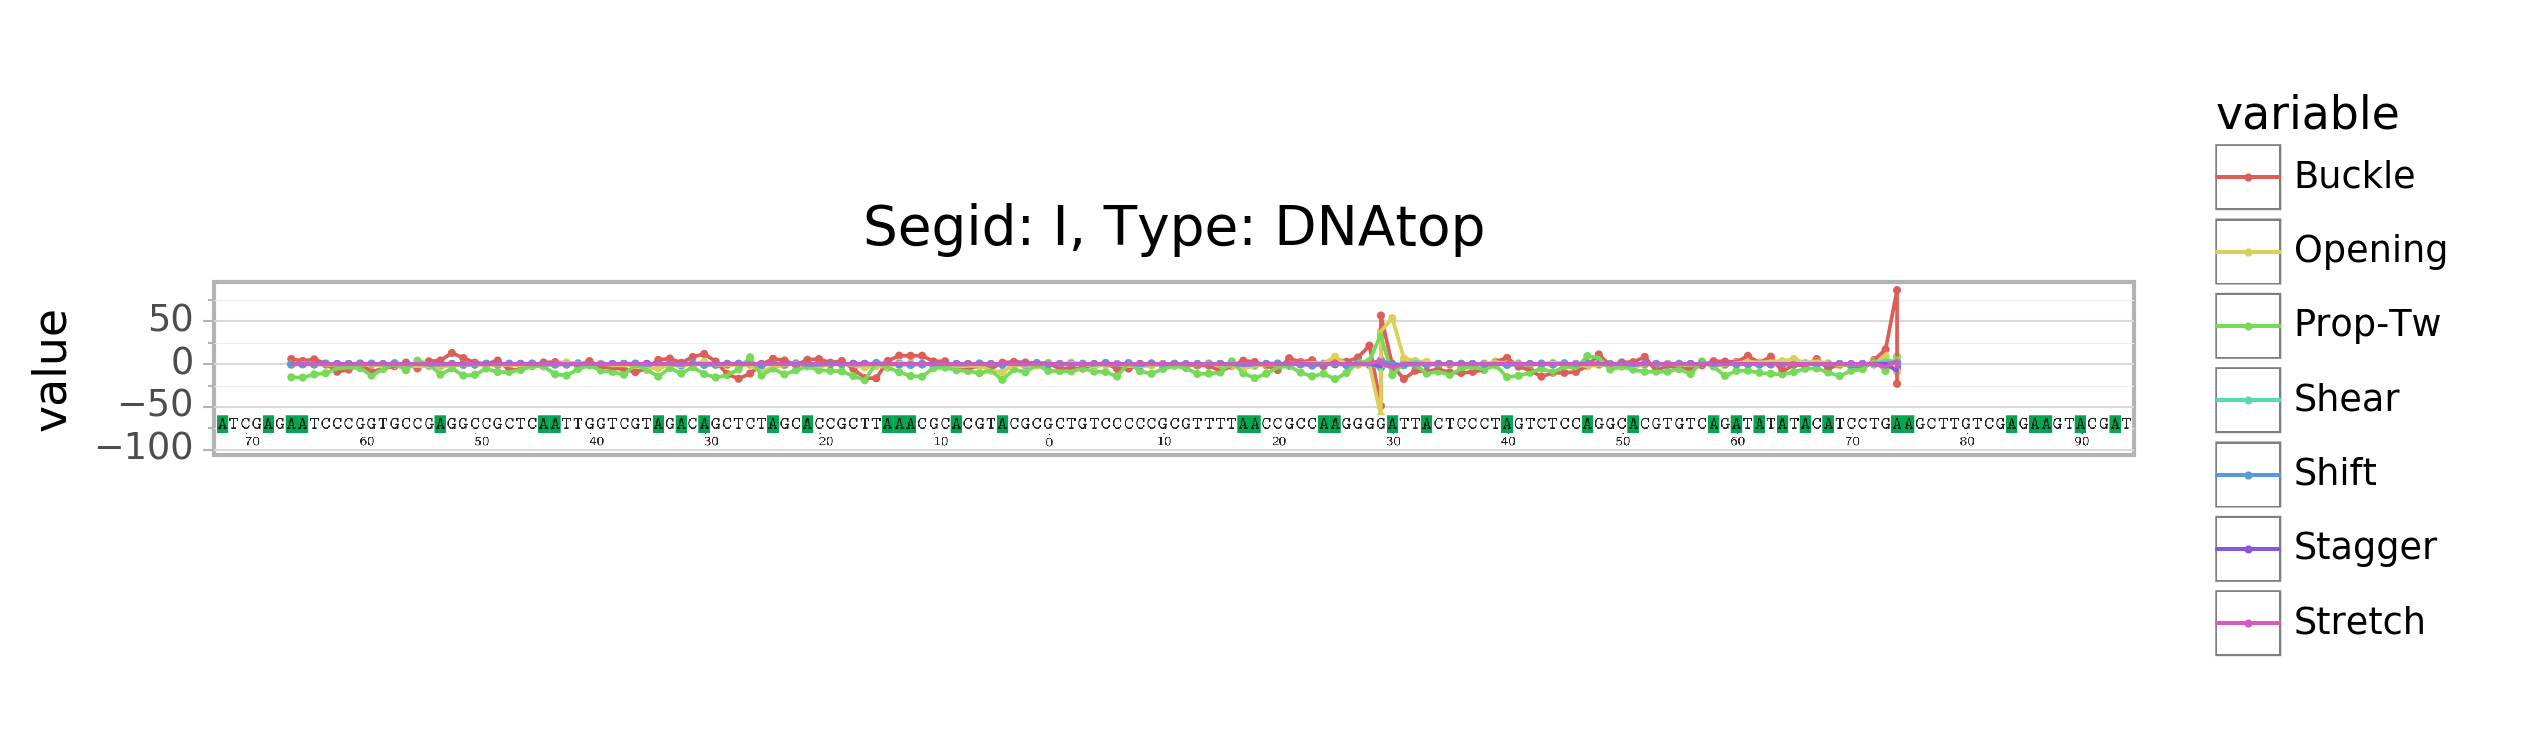

<ggplot: (8779896877807)>

In [31]:
pynucl.plot_line(d.df[d.df['BPnum']>5],p,columns=['Shear', 'Stretch', 'Stagger', 'Buckle', 'Prop-Tw', 'Opening', 'Shift'],startnumber=-72,funcgroups='\\funcgroup{xxx}{A}{Black}{Green}{upper}{up}')